In [54]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd 
from matplotlib.pyplot import figure
import seaborn as sns
import plotly.graph_objects as go

from plotly.offline import plot, iplot, init_notebook_mode
init_notebook_mode(connected=True)

!pip install openpyxl
teams = pd.read_excel('../input/2021-olympics-in-tokyo/Teams.xlsx', engine='openpyxl')
Athletes = pd.read_excel('../input/2021-olympics-in-tokyo/Athletes.xlsx', engine='openpyxl')
Coaches = pd.read_excel('../input/2021-olympics-in-tokyo/Coaches.xlsx', engine='openpyxl')
#EntriesGender = pd.read_excel('../input/2021-olympics-in-tokyo/EntriesGender.xlsx', engine='openpyxl')
#Medals = pd.read_excel('../input/2021-olympics-in-tokyo/Medals.xlsx', engine='openpyxl')
Medals = pd.read_excel('../input/medals-modified/Medals.xlsx', engine='openpyxl')
EntriesGender = pd.read_excel('../input/entriesgender/EntriesGender.xlsx', engine='openpyxl')

import warnings
warnings.filterwarnings("ignore")

/kaggle/input/entriesgender/EntriesGender.xlsx
/kaggle/input/2021-olympics-in-tokyo/EntriesGender.xlsx
/kaggle/input/2021-olympics-in-tokyo/Teams.xlsx
/kaggle/input/2021-olympics-in-tokyo/Athletes.xlsx
/kaggle/input/2021-olympics-in-tokyo/Coaches.xlsx
/kaggle/input/2021-olympics-in-tokyo/Medals.xlsx
/kaggle/input/medals-modified/Medals.xlsx
/kaggle/input/olympic-image/olympics-schedule-superJumbo.jpg


# Descriptive Analysis of Tokyo Olympics 2020(2021)

### Medals Won in Tokyo Olympics 2020

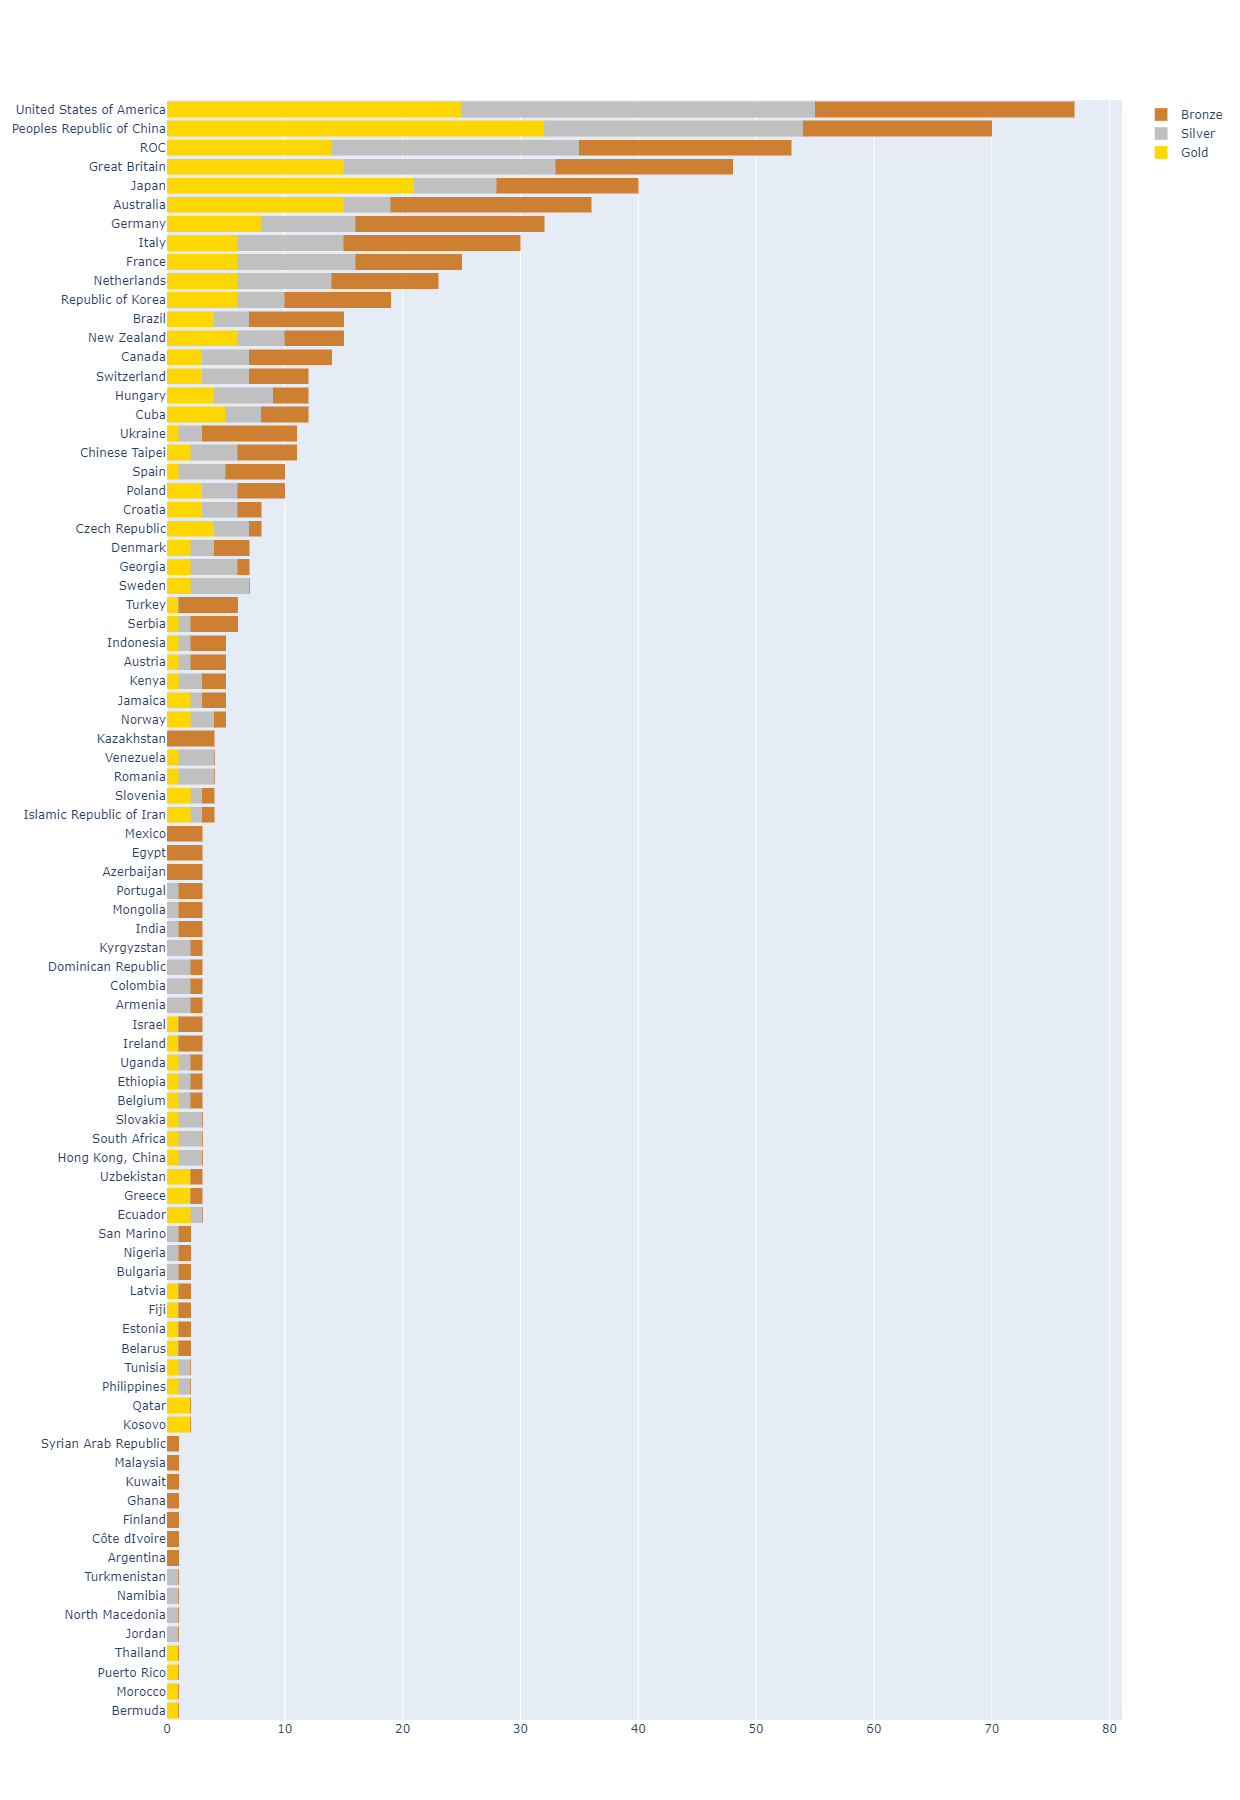

In [55]:
Medals.replace('\'','', regex=True, inplace=True) 
medals_country = Medals.loc[:,'Team/NOC']
medals_Gold = Medals.loc[:,'Gold']
medals_Silver = Medals.loc[:,'Silver']
medals_Bronze = Medals.loc[:,'Bronze']

fig2 = go.Figure()
fig2.add_trace(go.Bar(
    y=medals_country,
    x=medals_Gold,
    name='Gold',
    orientation='h',
    marker=dict(
        color='#FFD700',
        line=dict(color='#FFD700', width=0.5)
    )
))
fig2.add_trace(go.Bar(
    y=medals_country,
    x=medals_Silver,
    name='Silver',
    orientation='h',
    marker=dict(
        color='#C0C0C0',
        line=dict(color='#C0C0C0', width=0.5)
    )
))
fig2.add_trace(go.Bar(
    y=medals_country,
    x=medals_Bronze,
    name='Bronze',
    orientation='h',
    marker=dict(
        color='#CD7F32',
        line=dict(color='#CD7F32', width=0.5)
    )
))
fig2.update_layout(barmode='stack',
                  autosize=False,
                  height = 1800,
                  width = 800
                  )
fig2.show()


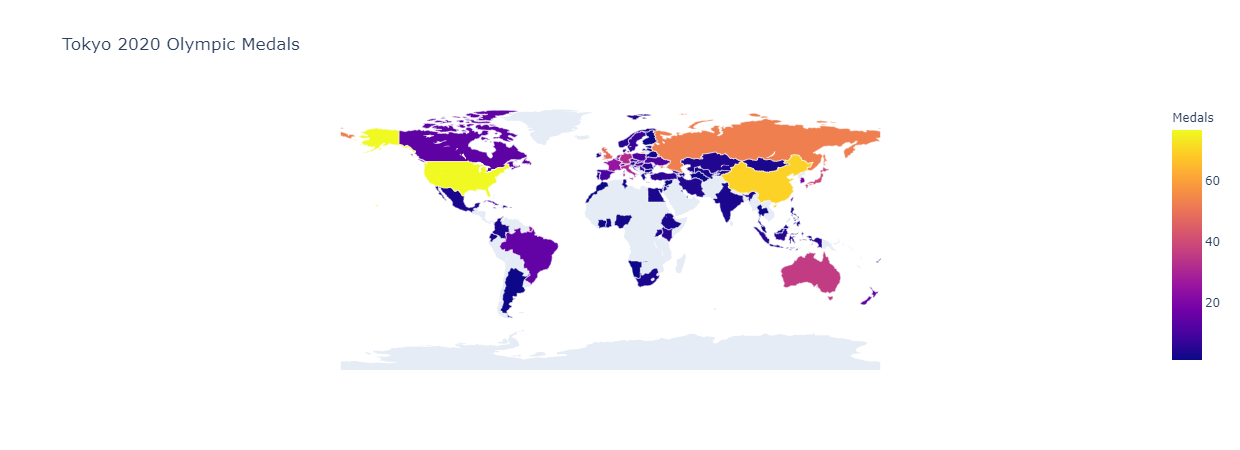

In [56]:
fig1 = go.Figure(data=go.Choropleth(
    locations = Medals.loc[:,'Code'],
    z = Medals.loc[:,'Total'],
    text = Medals.loc[:,'Team/NOC'],
    colorscale = 'Reds',
    autocolorscale=True,
    reversescale=False,
    marker_line_color='white',
    marker_line_width=0.5,
    colorbar_tickprefix = '',
    colorbar_title = 'Medals '
))

fig1.update_layout(
    title_text='Tokyo 2020 Olympic Medals',
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular',
        showlakes=True, # lakes
        lakecolor='rgb(255, 255, 255)'
    ),
    annotations = [dict(
        showarrow = False,
        text = ''
    )]
)

fig1.show()

## **Number of Teams Participated across each Discipline**

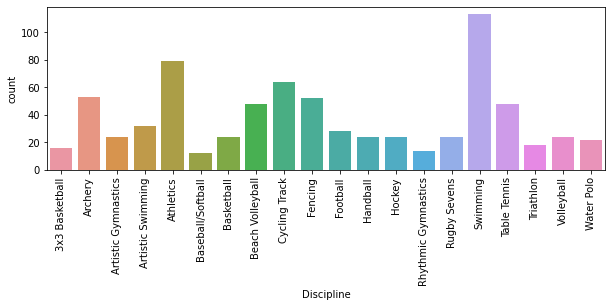

In [57]:
teams.replace('\'','', regex=True, inplace=True) 
Discipline = teams.loc[:,'Discipline']
sns.countplot(Discipline)
plt.xticks(rotation='vertical')
plt.show()

## **Number of Athelets Participated Across each discipline**

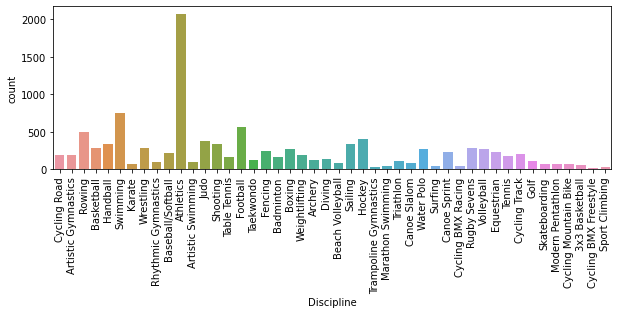

In [58]:
Athletes.replace('\'','', regex=True, inplace=True) 
Athletes_dis = Athletes.loc[:,'Discipline']
sns.countplot(Athletes_dis)
plt.xticks(rotation='vertical')
plt.rcParams["figure.figsize"] = (100,5)
plt.show()

## **Gender ratio of Participants**

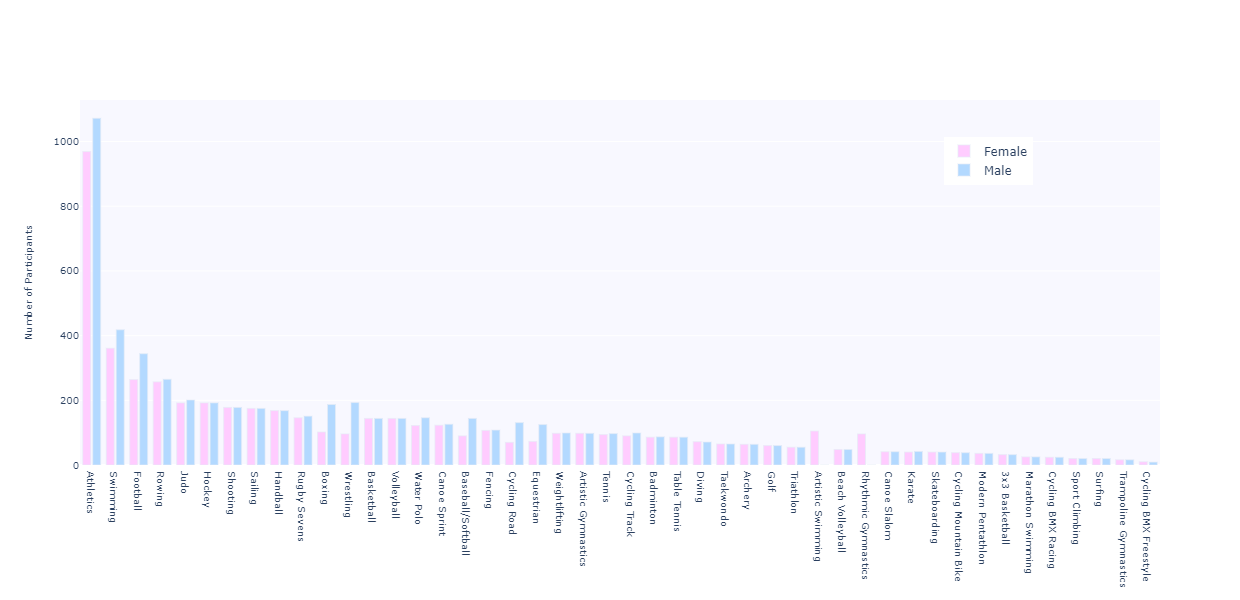

In [59]:
EntriesGender.replace('\'','', regex=True, inplace=True) 
EntriesGender_dis = EntriesGender.loc[:,'Discipline']
EntriesGender_tot = EntriesGender.loc[:,'Total']
EntriesGender_F = EntriesGender.loc[:,'Female']
EntriesGender_M = EntriesGender.loc[:,'Male']

fig = go.Figure(data=[
    go.Bar(name='Female', x=EntriesGender_dis, y= EntriesGender_F,marker_color='#ffccff'),
    go.Bar(name='Male', x=EntriesGender_dis, y= EntriesGender_M,marker_color ='#b3d9ff')
])
# Change the bar mode
fig.update_layout(barmode='group',
                  #paper_bgcolor='rgb(248, 248, 255)',
                  plot_bgcolor='rgb(248, 248, 255)',
                  xaxis_tickfont_size=10,
                  yaxis=dict(
                        title='Number of Participants',
                        titlefont_size=10,
                        tickfont_size=10,
                    ),
                    legend=dict(
                        x=0.8,
                        y=0.9,
                        bgcolor='rgba(255, 255, 255, 255)',
                        bordercolor='rgba(255, 255, 255, 0)'
                    ),
                  bargap=0.15, # gap between bars of adjacent location coordinates.
                  bargroupgap=0.2 ,# gap between bars of the same location coordinate.
                  height = 600,
                  width = 950
                 )
fig.show()

## **Number of Coaches Across each Discipline**


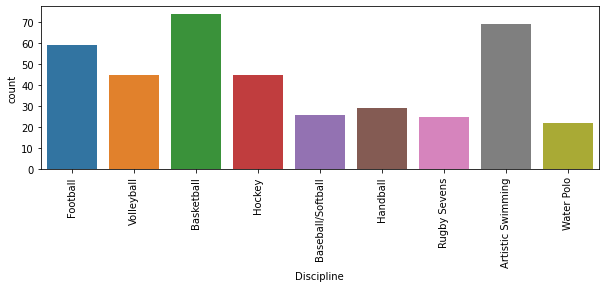

In [61]:
Coaches.replace('\'','', regex=True, inplace=True) 
Coaches_dis = Coaches.loc[:,'Discipline']
sns.countplot(Coaches_dis)
plt.xticks(rotation='vertical')
plt.rcParams["figure.figsize"] = (10,3)
plt.show()